# Spatial Analysis of Airbnb Listings in Berlin

## P. Rudolph, C. Brendel
## February 27th, 2019

## Abstract

-Correlation between rent and prices for Airbnb accomodations

-Identifying new clusters

## Introduction

Berlin has become one of the top tourist destination in the world with approximately 12 millions of tourists each year. All of those tourists need an accomodation for their stay in Berlin. Most of them choose to use the website “Airbnb”, in order to find their accomodation. Indeed, Airbnb attracts hosts and guests with its competitive prices and unique experiences. In Germany, Berlin is an unchallenged Airbnb capital, more flats and rooms are offered than in Hamburg, Munich, Cologne and Frankfurt combined. In 2014, approximately 11700 accommodation units are offered for rental in Berlin each day. According to the latest data published by airbnb there is a ratio of 1 in 200 flats can be found on Airbnb. However, not all neighbourhoods are equally popular when it comes to Airbnb rentals. The map below shows in which parts of Berlin most flats and rooms are offered. This reveals considerable differences between neighbourhoods.

In this report, we have decided to focus on the differences in pricing of the Airbnb offers between the district in Berlin. We believe that there is even higher discrepancy between the different neighbourhoods in terms of prices of rooms or flats. Therefore, we will try to see if there is a difference between the city center and the suburbs. As well, due to the historical context, such as the division by the Allies that was later enforced by the Berlin Wall, which separated Berlin into East and West for almost thirty years. We can wonder if there is a discrepancy between East and West Berlin in terms of prices for Airbnb accommodations as well.     

![Neighbourhoods](img/Berlinhoods_web.jpg)<br/>
*Figure 1. The wall going through Berlin | 
Source: http://annikamarlenhinze.com/images/Berlinhoods_web.jpg*


![Neighbourhoods](img/berlin-bezirke-karte.jpg)<br/>
*Figure 2. Map of Berlin | Source: https://reise.naanoo.de/wp-content/uploads/2017/03/berlin-bezirke-karte.jpg*



## Methods

### Clustering

For creating the spatial weights we used the rook contiguity and the euclidian distance based spatial weights. The rook contiguity has a lower p-value than the Euclidian Distance based method. Both methods show different results. While the rook contiguity shows only Müggelheim as a relevant cluster in the southeast of Berlin, the euclidian contiguity shows also Schmöckwitz and Grünau. In our non-mathmetical analysis Schmöckwitz seems highly significant, having the highest median price for any district in Berlin.



### Visualization

For the visualization of the individual Airbnb listings in Berlin we used Python and the Geopandas, Pandas, Matplotlib and Numpy libraries. The prices are seperated in three different types: 

- Accommodation Types:

    - Low Priced (16-29€)

    - Medium Priced (30-120€)

    - High Priced (121-241€)
    
The data for the Airbnb listings includes a lot of erroneous values; for instance, rooms for only one night for 1 € or accomodations for 60.000 € a night. These values are cut out.
    
### Correlation between average rent per m<sup>2</sup> and Airbnb prices

Sadly, we couldn't obtain a useful dataset for the average rent in Berlin for a correlation analysis with the median prices of the different districts in Berlin. Further data analysis requires this kind of dataset.

## Results
![BerlinPrices](img/berlin-districts-price.png)<br/>
*Figure 3. Percentile map of median Airbnb prices in Berlin*

As you can see in *Figure 3.*, the prices for an accommodation are lower in the eastern part of Berlin, still Berlin Schmöckewitz in the southeastern area is standing out, as it is the most expensive district for accommodations in Berlin.

On the map shown in *Figure 3.* you can also see the trend that the city center/downtown has the highest prices for accommodation after Berlin Schmöckewitz. The trend of the price structure in the center is comparable to an onion, having the highest prices in the inner peel and a gradient towards lower prices with every peel.

#### Rook Cluster

![RookCluster](img/Rook/berlin-districts-rook-cluster.png)<br/>
*Figure 4. Rook clustered map showing significant districts*

![RookCluster](img/Rook/berlin-districts-rook-lisa.png)<br/>
*Figure 5. Map showing the significance*

![RookCluster](img/Rook/berlin-districts-rook-LisaScatterPlotFrame.png)<br/>
*Figure 6. Lisa Scatter Plot Frame*


#### Euclidian Cluster

![EuclidianCluster](img/Euclidian/berlin-districts-euc-cluster.png)<br/>
*Figure 7. Euclidian clustered map showing significant districts*

![EuclidianCluster](img/Euclidian/berlin-districts-euc-lisa.png)<br/>
*Figure 8. Map showing the significance*

![EuclidianCluster](img/Euclidian/berlin-districts-euc-LisaScatterPlotFrame.png)<br/>
*Figure 9. Lisa Scatter Plot Frame*



## Discussion

![BerlinMietspiegel](img/berlin.png)<br/>
*Average rent in Euro per m<sup>2</sup> | Source: https://www.immobilienscout24.de/content/dam/is24/ibw/dokumente/berlin.png*

## Conclusion/Summary

## References

## Appendix

In [141]:
import numpy as np
import libpysal as lp
import geopandas as gpd
import pandas as pd
import shapely.geometry as shp
import matplotlib.pyplot as plt
import sklearn.metrics as skm
import seaborn as sns
%matplotlib inline

In [142]:
listings = pd.read_csv('./data/berlin-listings.csv.gz')
listings['geometry'] = listings[['longitude','latitude']].apply(shp.Point, axis=1)
listings = gpd.GeoDataFrame(listings)
listings.crs = {'init':'epsg:4269'}
listings = listings.to_crs(epsg=3857)



In [161]:
listings_low = listings[listings["price"]<30]
listings_median = listings[(listings["price"]>30) & (listings["price"]<=120)]
listings_high = listings[listings["price"]>120]

In [162]:
#listings_low.sort_values('price').plot('price',cmap="rainbow", legend=True)
#listings_median.sort_values('price').plot('price',cmap="rainbow", legend=True)
#listings_high.sort_values('price').plot('price', legend=True)

In [163]:
#base = district.plot("median_price", cmap='plasma', legend=True)
#listings.sort_values('price').plot('price', cmap="rainbow", legend=True)

#district.plot("median_price", cmap='rainbow', legend=True)

In [164]:
district = gpd.read_file('./data/berlin-districts.geojson').to_crs(epsg=3857)

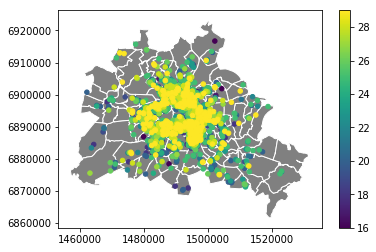

In [165]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
district.plot(ax=ax,color='grey', edgecolor='white')
listings_low.sort_values("price").plot("price", ax=ax, markersize=20, legend=True)
plt.show();

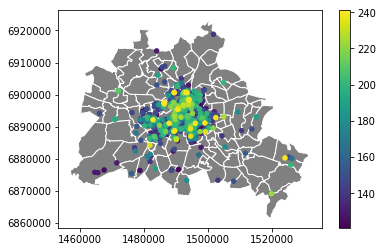

In [155]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
district.plot(ax=ax, color='grey', edgecolor='white')
listings_high.sort_values("price").plot("price", ax=ax, markersize=20, legend=True)
plt.show();

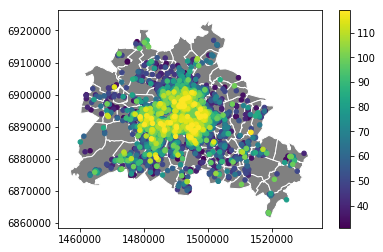

In [156]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
district.plot(ax=ax, color='grey', edgecolor='white')
listings_median.sort_values("price").plot("price", ax=ax, markersize=20, legend=True)
plt.show();

In [169]:
np.min(listings["price"])


16.0